# Titanic Survivor Prediction
The goal of this analysis is to find a model that can achieve the highest accuracy based on the giving data.

The used dataset can be found here: https://www.kaggle.com/c/titanic/overview

## Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Preparation

## Loading Data

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dropping irrelevant data for the prediction

In [3]:
raw_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
raw_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Descriptive Stats

In [4]:
raw_data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


## Missing Values

In [5]:
raw_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Drop rows where Age is missing

In [6]:
raw_data_age = raw_data.dropna(axis=0, subset=['Age'])

Replace missing embarked with most frequent value

In [7]:
raw_data_age['Embarked'] = raw_data_age['Embarked'].fillna(raw_data_age['Embarked'].mode().iloc[0])

raw_data_age.isnull().sum() #quick check if everything worked smoothly

<ipython-input-7-4a2eb030379d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_age['Embarked'] = raw_data_age['Embarked'].fillna(raw_data_age['Embarked'].mode().iloc[0])


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Identify the predictors for the data and data editing

### Survival rates for different features

In [8]:
#survival rate per sex
raw_data_age[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.754789
1,male,0.205298


In [9]:
#survival rate per class
raw_data_age[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.655914
1,2,0.479769
2,3,0.239437


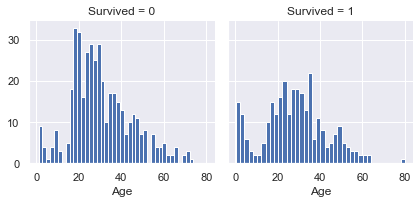

In [10]:
#visualize age feature and survival in different age ranges
v_age = sns.FacetGrid(raw_data_age, col='Survived')
v_age.map(plt.hist, 'Age', bins=40)

## Adding new features

### AgeRange

In [11]:
raw_data_age['AgeRange'] = pd.cut(raw_data_age['Age'], bins=8)
raw_data_age[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='Survived')

<ipython-input-11-6030fb7b7f3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_age['AgeRange'] = pd.cut(raw_data_age['Age'], bins=8)


,AgeRange,Survived
7,"(70.052, 80.0]",0.200000
6,"(60.105, 70.052]",0.235294
2,"(20.315, 30.263]",0.365217
1,"(10.368, 20.315]",0.382609
4,"(40.21, 50.158]",0.383721
5,"(50.158, 60.105]",0.404762
3,"(30.263, 40.21]",0.445161
0,"(0.34, 10.368]",0.593750


In [12]:
raw_data_age['AgeRange'] = pd.cut(raw_data_age['Age'], bins=8, 
                                  labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70', '70-80'])

<ipython-input-12-63a543e8c6dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_age['AgeRange'] = pd.cut(raw_data_age['Age'], bins=8,


In [13]:
raw_data_age = raw_data_age.drop(['Age'], axis=1)
raw_data_age.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeRange
0,0,3,male,1,0,7.2500,S,20-30
1,1,1,female,1,0,71.2833,C,30-40
2,1,3,female,0,0,7.9250,S,20-30
3,1,1,female,1,0,53.1000,S,30-40
4,0,3,male,0,0,8.0500,S,30-40


### FareRange

C:\Users\lucaf\.anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


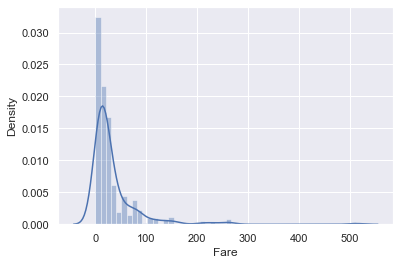

In [14]:
v_fare = sns.distplot(raw_data_age['Fare'])

In [15]:
raw_data_age['FareRange'] = pd.qcut(raw_data_age['Fare'], q=4)
raw_data_age[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

,FareRange,Survived
0,"(-0.001, 8.05]",0.204188
1,"(8.05, 15.742]",0.329341
2,"(15.742, 33.375]",0.480226
3,"(33.375, 512.329]",0.620112


In [16]:
raw_data_age['FareRange'] = pd.qcut(raw_data_age['Fare'], q=4, labels = ['Q1', 'Q2', 'Q3', 'Q4'])
raw_data_age.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeRange,FareRange
0,0,3,male,1,0,7.2500,S,20-30,Q1
1,1,1,female,1,0,71.2833,C,30-40,Q4
2,1,3,female,0,0,7.9250,S,20-30,Q1
3,1,1,female,1,0,53.1000,S,30-40,Q4
4,0,3,male,0,0,8.0500,S,30-40,Q1


In [17]:
raw_data_age = raw_data_age.drop(['Fare'], axis=1)

### Family Size

In [18]:
raw_data_age['Family'] = raw_data_age['SibSp'] + raw_data_age['Parch'] + 1

In [19]:
raw_data_age[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived')

,Family,Survived
7,8,0.000000
5,6,0.136364
4,5,0.272727
0,1,0.321782
6,7,0.333333
1,2,0.546763
2,3,0.569892
3,4,0.777778


In [20]:
raw_data_age = raw_data_age.drop(['SibSp', 'Parch'], axis=1)

In [21]:
raw_data_age.head()

,Survived,Pclass,Sex,Embarked,AgeRange,FareRange,Family
0,0,3,male,S,20-30,Q1,2
1,1,1,female,C,30-40,Q4,2
2,1,3,female,S,20-30,Q1,1
3,1,1,female,S,30-40,Q4,2
4,0,3,male,S,30-40,Q1,1


## Prepare data for modeling

In [22]:
surv_dummies = pd.get_dummies(raw_data_age, drop_first=True)
surv_dummies.head()

,Survived,Pclass,Family,Sex_male,Embarked_Q,Embarked_S,AgeRange_10-20,AgeRange_20-30,AgeRange_30-40,AgeRange_40-50,AgeRange_50-60,AgeRange_60-70,AgeRange_70-80,FareRange_Q2,FareRange_Q3,FareRange_Q4
0,0,3,2,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,3,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,1,2,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0,3,1,1,0,1,0,0,1,0,0,0,0,0,0,0


In [23]:
surv_dummies.to_csv('train_dummies.csv', index=False)

# Modeling and Evaluation

## Import additional and relevant packages

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

## Load Data

In [25]:
surv_dummies = pd.read_csv('train_dummies.csv')

In [26]:
surv_dummies.head()

,Survived,Pclass,Family,Sex_male,Embarked_Q,Embarked_S,AgeRange_10-20,AgeRange_20-30,AgeRange_30-40,AgeRange_40-50,AgeRange_50-60,AgeRange_60-70,AgeRange_70-80,FareRange_Q2,FareRange_Q3,FareRange_Q4
0,0,3,2,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,3,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,1,2,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0,3,1,1,0,1,0,0,1,0,0,0,0,0,0,0


## Prepare data for modeling

In [27]:
target = surv_dummies['Survived']
predictors = surv_dummies.drop(['Survived'], axis=1)

In [28]:
predictors.head()

,Pclass,Family,Sex_male,Embarked_Q,Embarked_S,AgeRange_10-20,AgeRange_20-30,AgeRange_30-40,AgeRange_40-50,AgeRange_50-60,AgeRange_60-70,AgeRange_70-80,FareRange_Q2,FareRange_Q3,FareRange_Q4
0,3,2,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,1,0,0,0,0,0,0,1
2,3,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,2,0,0,1,0,0,1,0,0,0,0,0,0,1
4,3,1,1,0,1,0,0,1,0,0,0,0,0,0,0


In [29]:
#Train/Test Split: 80/20
X_train, X_Test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=123)

In [30]:
# Used to check the balance of the data
y_train.value_counts()

0    337
1    234
Name: Survived, dtype: int64

## Creating and evaluating classifaction models

The underlying question and predicting whether a passenger has survived or not is a supervised machine learning problem. There is a set of algorithms that can be used to tackle such a problem. In this notebook I want to explore the decision tree, random forest and logistic regression algorithm. 
Based on that the models will be evaluated and interpreted.

### Decision Tree

In [31]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
confusion_matrix(y_test, tree.predict(X_Test))

array([[74, 13],
       [22, 34]], dtype=int64)

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, tree.predict(X_Test)).ravel() # check that tp, fp, tn, fn are not confused
print(tn, fp, fn, tp)

74 13 22 34


In [34]:
print(classification_report(y_train, tree.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       337
           1       0.95      0.78      0.86       234

    accuracy                           0.89       571
   macro avg       0.91      0.88      0.89       571
weighted avg       0.90      0.89      0.89       571



In [35]:
print(classification_report(y_test, tree.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        87
           1       0.72      0.61      0.66        56

    accuracy                           0.76       143
   macro avg       0.75      0.73      0.73       143
weighted avg       0.75      0.76      0.75       143



In [53]:
accuracy_score(y_test, tree.predict(X_Test))

0.7552447552447552

In [36]:
list(zip(X_train.columns, tree.feature_importances_))

[('Pclass', 0.16183163121002742),
 ('Family', 0.08746038394558926),
 ('Sex_male', 0.43845618328487285),
 ('Embarked_Q', 0.011260686605553134),
 ('Embarked_S', 0.03163143045407709),
 ('AgeRange_10-20', 0.0355794071992227),
 ('AgeRange_20-30', 0.04016215775562327),
 ('AgeRange_30-40', 0.04227994012860846),
 ('AgeRange_40-50', 0.039890864941087206),
 ('AgeRange_50-60', 0.026674109818118942),
 ('AgeRange_60-70', 0.01769232499727609),
 ('AgeRange_70-80', 0.0031223737847008914),
 ('FareRange_Q2', 0.020654153433480336),
 ('FareRange_Q3', 0.03736188439406077),
 ('FareRange_Q4', 0.0059424680477016155)]

Performance on the test data is significantly lower than on the training data, that could be caused by the decision tree overfitting on training data and therefore not generalization good enough. 

So far, the most influential factors for survival seem to be the Class the passenger was travelling in as well as the gender.

### Random Forest

In [37]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
confusion_matrix(y_test, random_forest.predict(X_Test))

array([[78,  9],
       [16, 40]], dtype=int64)

In [39]:
print(classification_report(y_train, random_forest.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       337
           1       0.89      0.84      0.87       234

    accuracy                           0.89       571
   macro avg       0.89      0.88      0.89       571
weighted avg       0.89      0.89      0.89       571



In [40]:
print(classification_report(y_test, random_forest.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        87
           1       0.82      0.71      0.76        56

    accuracy                           0.83       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.83      0.82       143



In [54]:
accuracy_score(y_test, random_forest.predict(X_Test))

0.8251748251748252

In [41]:
list(zip(X_train.columns, random_forest.feature_importances_))

[('Pclass', 0.14238340275100997),
 ('Family', 0.15208224074050833),
 ('Sex_male', 0.3532245269216074),
 ('Embarked_Q', 0.013683557971050295),
 ('Embarked_S', 0.050628712402839636),
 ('AgeRange_10-20', 0.02934739893219183),
 ('AgeRange_20-30', 0.04292253560955532),
 ('AgeRange_30-40', 0.04147268039933295),
 ('AgeRange_40-50', 0.029057149778776895),
 ('AgeRange_50-60', 0.01473187038870092),
 ('AgeRange_60-70', 0.015170159537800838),
 ('AgeRange_70-80', 0.004493899630432524),
 ('FareRange_Q2', 0.029418436858640887),
 ('FareRange_Q3', 0.032433881067567),
 ('FareRange_Q4', 0.04894954700998532)]

This classifier also performs lower on the test data, which could be due to overfitting. Additionally to the most influential features that we have seen before, this time also the family size seems to be a factor. 

### Logistic Regression

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
confusion_matrix(y_test, logreg.predict(X_Test))

array([[71, 16],
       [17, 39]], dtype=int64)

In [44]:
print(classification_report(y_train, logreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       337
           1       0.77      0.73      0.75       234

    accuracy                           0.80       571
   macro avg       0.79      0.79      0.79       571
weighted avg       0.80      0.80      0.80       571



In [45]:
print(classification_report(y_test, logreg.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        87
           1       0.71      0.70      0.70        56

    accuracy                           0.77       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



In [55]:
accuracy_score(y_test, logreg.predict(X_Test))

0.7692307692307693

The logistic regression model performs similar on the training and test data, which might mean that it generalizes well on new data. 

## Prediction

For the prediction I will use the logistic regression model since it was the best out of the three models

In [46]:
# assignment of the logistic regression model to my variable.
deployment_classifier = logreg
deployment_classifier

LogisticRegression()

In [60]:
# for test purposes I will predict the first five passengers. The outcome is an array with 0 = not survived and 1 = survived
deployment_classifier.predict(predictors.iloc[0:5])

array([0, 1, 1, 1, 0], dtype=int64)

In [61]:
# first two rows of training data
surv_dummies.head(5)

,Survived,Pclass,Family,Sex_male,Embarked_Q,Embarked_S,AgeRange_10-20,AgeRange_20-30,AgeRange_30-40,AgeRange_40-50,AgeRange_50-60,AgeRange_60-70,AgeRange_70-80,FareRange_Q2,FareRange_Q3,FareRange_Q4
0,0,3,2,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,3,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,1,2,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0,3,1,1,0,1,0,0,1,0,0,0,0,0,0,0


In [62]:
# first two rows of predictors (training data without the column "survived")
predictors.head(5)

,Pclass,Family,Sex_male,Embarked_Q,Embarked_S,AgeRange_10-20,AgeRange_20-30,AgeRange_30-40,AgeRange_40-50,AgeRange_50-60,AgeRange_60-70,AgeRange_70-80,FareRange_Q2,FareRange_Q3,FareRange_Q4
0,3,2,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,1,0,0,0,0,0,0,1
2,3,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,2,0,0,1,0,0,1,0,0,0,0,0,0,1
4,3,1,1,0,1,0,0,1,0,0,0,0,0,0,0


The model correctly predicts the likelyhood of people having survived or not survived.

## Additional Thoughts

Regarding the overfitting problem that has been encountered using the tree-classifier, one solution for that could be to experiment with the tree depth and then compare the different evaluation metrics.

Furthermore it can be said that it would also be possible to use tensorflow and keras to apply a neural network on the dataset and see how it performs. But to be able to do that further data processing would be needed.